In [11]:
import pandas as pd
from Bio import SeqIO
import os
from IPython.display import Image
import matplotlib.pyplot as plt

RESULT_PATH = "/home/dallas/Data/DeepBGC/KOD1"
RESULT_NAME = "KOD1"
%matplotlib inline

In [12]:
def print_text_file(path, limit=50):
    with open(path) as f:
        for i, line in enumerate(f):
            if i == limit:
                print('...showing first {} lines only...'.format(limit))
                break
            print(line, end='')


In [13]:
print_text_file(os.path.join(RESULT_PATH, 'README.txt'))

DeepBGC
/home/dallas/miniconda3/bin/deepbgc pipeline KOD1.fa
LOG.txt	Log output of DeepBGC
KOD1.bgc.gbk 	Sequences and features of all detected BGCs in GenBank format
KOD1.bgc.tsv 	Table of detected BGCs and their properties
KOD1.full.gbk 	Fully annotated input sequence with proteins, Pfam domains (PFAM_domain features) and BGCs (cluster features)
KOD1.pfam.tsv 	Table of Pfam domains (pfam_id) from given sequence (sequence_id) in genomic order, with BGC detection scores
evaluation/KOD1.bgc.png 	Detected BGCs plotted by their nucleotide coordinates
evaluation/KOD1.pr.png 	Precision-Recall curve based on predicted per-Pfam BGC scores
evaluation/KOD1.roc.png 	ROC curve based on predicted per-Pfam BGC scores
evaluation/KOD1.score.png 	BGC detection scores of each Pfam domain in genomic order



In [14]:
print_text_file(os.path.join(RESULT_PATH, 'LOG.txt'))

Loading model from: /home/dallas/.local/share/deepbgc/data/0.1.0/detector/deepbgc.pkl
From /home/dallas/miniconda3/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
From /home/dallas/miniconda3/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loading model from: /home/dallas/.local/share/deepbgc/data/0.1.0/classifier/product_class.pkl
Loading model from: /home/dallas/.local/share/deepbgc/data/0.1.0/classifier/product_activity.pkl
Processing record #1: NC_006624.1
Preparing record NC_006624.1
Updating record alphabet to generic_

In [15]:
print_text_file(os.path.join(RESULT_PATH, RESULT_NAME+'.bgc.gbk'), limit=70)


LOCUS       NC_006624.1             4549 bp    DNA              UNK 01-JAN-1980
DEFINITION  .
ACCESSION   NC_006624.1_31275-35824.1
VERSION     NC_006624.1_31275-35824.1
KEYWORDS    .
SOURCE      
  ORGANISM  
            .
FEATURES             Location/Qualifiers
     cluster         1..4549
                     /detector_label="deepbgc"
                     /detector_version="0.1.0"
                     /product_class="Other"
                     /product="deepbgc_putative"
                     /deepbgc_score="0.86736"
                     /product_class_score="Alkaloid=0.00,NRP=0.00,Other=0.53,Pol
                     yketide=0.04,RiPP=0.20,Saccharide=0.00,Terpene=0.23"
                     /product_activity_score="antibacterial=0.45,cytotoxic=0.40,
                     inhibitor=0.22,antifungal=0.05"
                     /detector="deepbgc"
                     /bgc_candidate_id="NC_006624.1_31275-35824.1"
                     /detector_version_timestamp="1551305667.986168"
     CD

In [16]:
bgc_records = SeqIO.parse(os.path.join(RESULT_PATH, RESULT_NAME+'.bgc.gbk'), 'genbank')

for i, bgc_record in enumerate(bgc_records):
    if i == 3:
        break
    print('='*80)
    print('BGC {}'.format(i+1))
    print(bgc_record)
    print()



BGC 1
ID: NC_006624.1_31275-35824.1
Name: NC_006624.1
Number of features: 16
/molecule_type=DNA
/source=
/data_file_division=UNK
/keywords=['']
/accessions=['NC_006624.1_31275-35824.1']
/organism=
/date=01-JAN-1980
/taxonomy=[]
Seq('ATGCCCACCTCCCTAGTTCGCGCCGTCGATACCAACCTAGACCTTATGACCGAG...TGA', IUPACAmbiguousDNA())

BGC 2
ID: NC_006624.1_47170-47800.1
Name: NC_006624.1
Number of features: 6
/molecule_type=DNA
/source=
/data_file_division=UNK
/keywords=['']
/accessions=['NC_006624.1_47170-47800.1']
/organism=
/date=01-JAN-1980
/taxonomy=[]
Seq('ATGGTCAGGCTCATAGCTTTTGACCTTGAGGGCACGCTTGTTAGGTCAGTTTCG...TGA', IUPACAmbiguousDNA())

BGC 3
ID: NC_006624.1_191877-196115.1
Name: NC_006624.1
Number of features: 32
/molecule_type=DNA
/source=
/data_file_division=UNK
/keywords=['']
/accessions=['NC_006624.1_191877-196115.1']
/organism=
/date=01-JAN-1980
/taxonomy=[]
Seq('ATGGTGCCATGGATGGAAGAAAGGTGGGACTTTGACTCGTGGGCGGAGAGCTAT...TGA', IUPACAmbiguousDNA())



In [17]:
bgcs = pd.read_csv(os.path.join(RESULT_PATH, RESULT_NAME+'.bgc.tsv'), sep='\t')
bgcs.head()


,sequence_id,detector,detector_version,detector_label,bgc_candidate_id,nucl_start,nucl_end,nucl_length,num_proteins,num_domains,...,Alkaloid,NRP,Other,Polyketide,RiPP,Saccharide,Terpene,protein_ids,bio_pfam_ids,pfam_ids
0,NC_006624.1,deepbgc,0.1.0,deepbgc,NC_006624.1_31275-35824.1,31275,35824,4549,4,11,...,0.00,0.00,0.53,0.04,0.20,0.00,0.23,NC_006624.1_NC_006624.1_37;NC_006624.1_NC_0066...,PF08242;PF08241,PF01209;PF13489;PF03848;PF01135;PF13847;PF1364...
1,NC_006624.1,deepbgc,0.1.0,deepbgc,NC_006624.1_47170-47800.1,47170,47800,630,1,4,...,0.00,0.08,0.20,0.28,0.18,0.05,0.26,NC_006624.1_NC_006624.1_52,PF00702,PF00702;PF13419;PF12710;PF08282
2,NC_006624.1,deepbgc,0.1.0,deepbgc,NC_006624.1_191877-196115.1,191877,196115,4238,8,23,...,0.01,0.04,0.16,0.04,0.69,0.03,0.04,NC_006624.1_NC_006624.1_227;NC_006624.1_NC_006...,PF00583;PF08242;PF08241,PF05148;PF01209;PF07021;PF13489;PF13847;PF1364...
3,NC_006624.1,deepbgc,0.1.0,deepbgc,NC_006624.1_197750-206817.1,197750,206817,9067,12,34,...,0.05,0.06,0.45,0.20,0.13,0.00,0.13,NC_006624.1_NC_006624.1_237;NC_006624.1_NC_006...,PF00107;PF08242;PF00891;PF08241,PF13489;PF03602;PF01209;PF08003;PF05401;PF0517...
4,NC_006624.1,deepbgc,0.1.0,deepbgc,NC_006624.1_212941-230824.1,212941,230824,17883,22,62,...,0.15,0.13,0.28,0.13,0.04,0.22,0.14,NC_006624.1_NC_006624.1_257;NC_006624.1_NC_006...,PF00155;PF00106;PF01488;PF01266;PF00288;PF0273...,PF04715;PF00425;PF00117;PF07722;PF00697;PF0029...


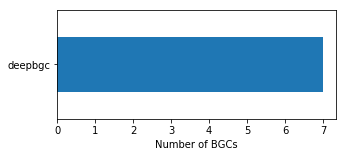

In [18]:
ax = bgcs['detector_label'].value_counts().plot.barh(figsize=(5, 2))
ax.set_xlabel('Number of BGCs');


Average BGC nucleotide length:
detector_label
deepbgc    10957.285714
Name: nucl_length, dtype: float64


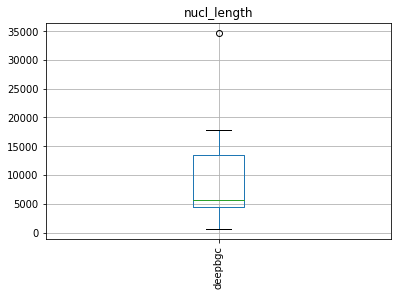

In [19]:
ax = bgcs.boxplot(column='nucl_length', by='detector_label')
plt.xticks(rotation=90)
ax.set_xlabel('')
ax.figure.suptitle('')
print('Average BGC nucleotide length:')
print(bgcs.groupby('detector_label')['nucl_length'].mean())


Average number of proteins in BGC:
detector_label
deepbgc    12.428571
Name: num_proteins, dtype: float64


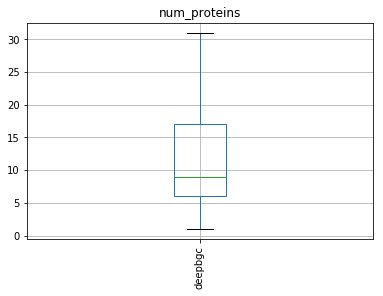

In [20]:
ax = bgcs.boxplot(column='num_proteins', by='detector_label')
plt.xticks(rotation=90)
ax.set_xlabel('')
ax.figure.suptitle('')
print('Average number of proteins in BGC:')
print(bgcs.groupby('detector_label')['num_proteins'].mean())

In [21]:
domains = pd.read_csv(os.path.join(RESULT_PATH, RESULT_NAME+'.pfam.tsv'), sep='\t')
domains.head()


,sequence_id,pfam_id,protein_id,gene_start,gene_strand,gene_end,deepbgc_score
0,NC_006624.1,PF03104,NC_006624.1_NC_006624.1_1,0,1,5016,0.01633
1,NC_006624.1,PF13482,NC_006624.1_NC_006624.1_1,0,1,5016,0.01193
2,NC_006624.1,PF10108,NC_006624.1_NC_006624.1_1,0,1,5016,0.00930
3,NC_006624.1,PF14623,NC_006624.1_NC_006624.1_1,0,1,5016,0.00916
4,NC_006624.1,PF14528,NC_006624.1_NC_006624.1_1,0,1,5016,0.00506


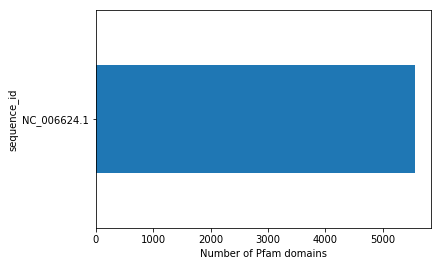

In [22]:
ax = domains.groupby('sequence_id').size().plot.barh()
ax.set_xlabel('Number of Pfam domains');

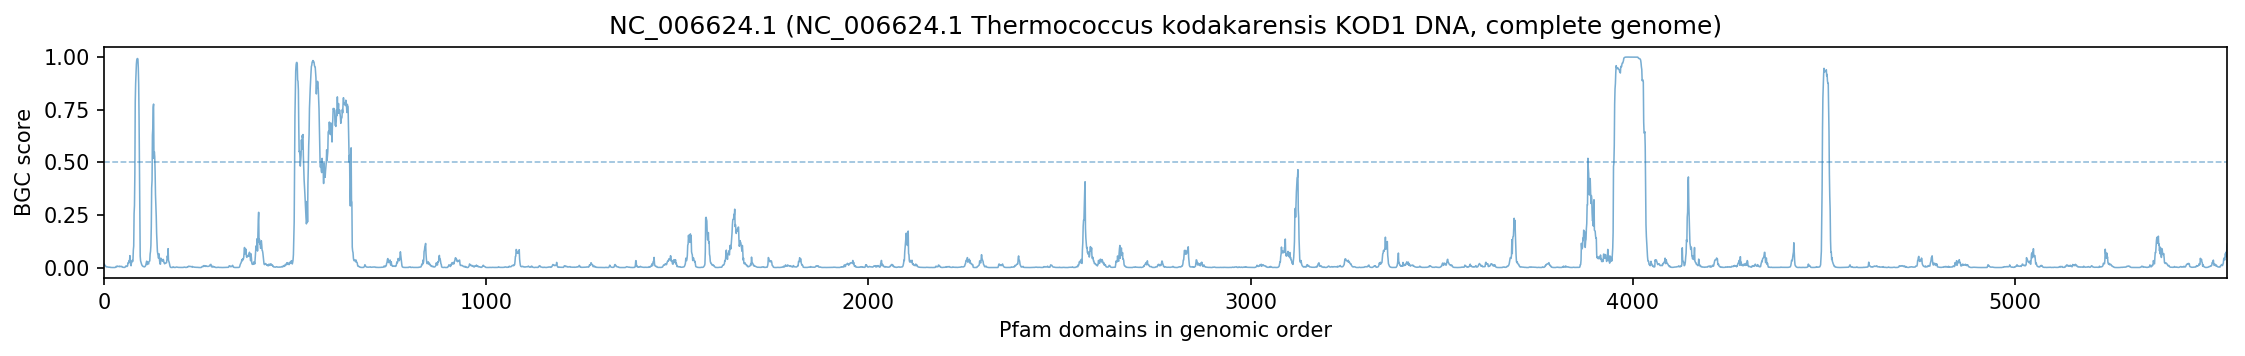

In [23]:
Image(filename=os.path.join(RESULT_PATH, 'evaluation', RESULT_NAME+'.score.png'))



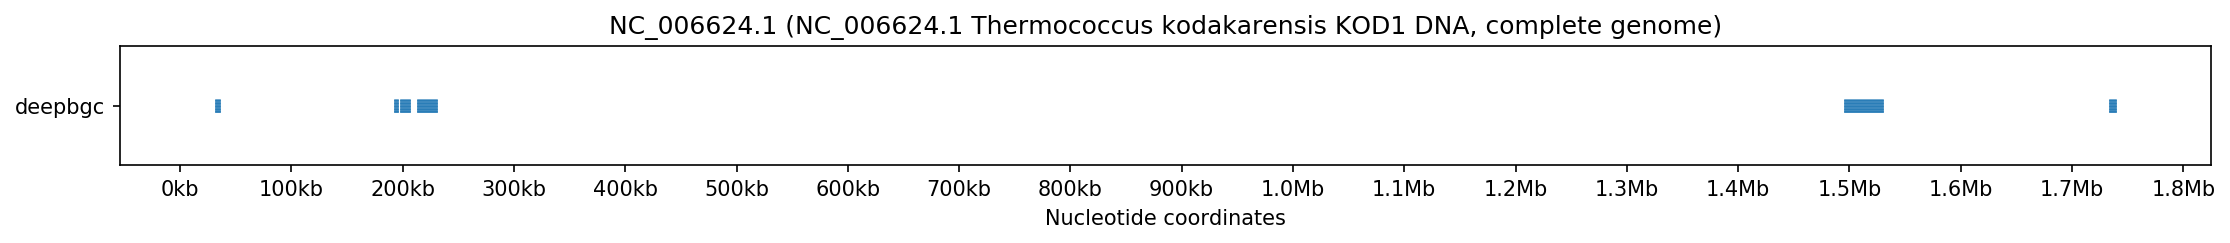

In [24]:
Image(filename=os.path.join(RESULT_PATH, 'evaluation', RESULT_NAME+'.bgc.png'))


In [26]:
Image(filename=os.path.join(RESULT_PATH, 'evaluation', RESULT_NAME + '.roc.png'))


FileNotFoundError: [Errno 2] No such file or directory: '/home/dallas/Data/DeepBGC/KOD1/evaluation/KOD1.roc.png'